In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


###These are some additional information about the crouses gathered by exploring the course pages on EdX, including 'course launch dates', 'course registration openning', 'last day of the courses'. Last two (subject_popularity, famous_instructor) are popularity of course subject and instructors based on number of google hits theey have. 

In [3]:
course_launch = {'HarvardX/CB22x/2013_Spring':'2013-03-13', 'HarvardX/CS50x/2012':'2012-10-15', 
                     'HarvardX/ER22x/2013_Spring':'2013-03-02', 'HarvardX/PH207x/2012_Fall':'2012-10-15',
                    'HarvardX/PH278x/2013_Spring':'2013-05-15',
              'MITx/6.002x/2012_Fall': '2012-09-05',
             'MITx/6.00x/2012_Fall':'2012-09-26',
                  'MITx/3.091x/2012_Fall':'2012-10-09',
                   'MITx/6.00x/2013_Spring':'2013-02-04',
                         'MITx/3.091x/2013_Spring':'2013-02-05', 
                 'MITx/14.73x/2013_Spring':'2013-02-12',
                  'MITx/8.02x/2013_Spring':'2013-02-18', 
                 'MITx/6.002x/2013_Spring':'2013-03-03', 
                  'MITx/7.00x/2013_Spring':'2013-03-05',
           'MITx/2.01x/2013_Spring':'2013-04-15',                     
                 'MITx/8.MReV/2013_Summer':'2013-06-01'}



regis_open = {'HarvardX/CB22x/2013_Spring':'2012-12-19', 'HarvardX/CS50x/2012':'2012-07-24', 
                     'HarvardX/ER22x/2013_Spring':'2012-12-19', 'HarvardX/PH207x/2012_Fall':'2012-07-24',
                    'HarvardX/PH278x/2013_Spring':'2012-12-19',             
              'MITx/6.002x/2012_Fall': '2012-07-24',
             'MITx/6.00x/2012_Fall':'2012-07-24',
                  'MITx/3.091x/2012_Fall':'2012-07-24',
                   'MITx/6.00x/2013_Spring':'2012-12-19',
                         'MITx/3.091x/2013_Spring':'2012-12-20', 
                 'MITx/14.73x/2013_Spring':'2012-12-19',
                  'MITx/8.02x/2013_Spring':'2013-01-17', 
                 'MITx/6.002x/2013_Spring':'2012-12-20', 
                  'MITx/7.00x/2013_Spring':'2013-01-30',
           'MITx/2.01x/2013_Spring':'2013-02-24',                     
                 'MITx/8.MReV/2013_Summer':'2013-04-27' }

course_wrap = {'HarvardX/CB22x/2013_Spring':'2013-08-26', 'HarvardX/CS50x/2012':'2013-04-15', 
                     'HarvardX/ER22x/2013_Spring':'2013-07-26', 'HarvardX/PH207x/2012_Fall':'2013-01-30',
                    'HarvardX/PH278x/2013_Spring':'2013-07-25',               
              'MITx/6.002x/2012_Fall': '2012-12-25',
             'MITx/6.00x/2012_Fall':'2013-01-15',
                  'MITx/3.091x/2012_Fall':'2013-01-15',
                   'MITx/6.00x/2013_Spring':'2013-06-04',
                         'MITx/3.091x/2013_Spring':'2013-06-21', 
                 'MITx/14.73x/2013_Spring':'2013-05-21',
                  'MITx/8.02x/2013_Spring':'2013-06-18', 
                 'MITx/6.002x/2013_Spring':'2013-07-01', 
                  'MITx/7.00x/2013_Spring':'2013-06-06',
           'MITx/2.01x/2013_Spring':'2013-07-30',                     
                 'MITx/8.MReV/2013_Summer':'2013-09-15' }


subject_popularity = {'HarvardX/CB22x/2013_Spring':1900000, 'HarvardX/CS50x/2012':245000000, 
                     'HarvardX/ER22x/2013_Spring':500000000, 'HarvardX/PH207x/2012_Fall':10000000,
                    'HarvardX/PH278x/2013_Spring':100000000,'MITx/6.002x/2012_Fall':16000000,
                'MITx/6.00x/2012_Fall':100000000, 
                'MITx/3.091x/2012_Fall':57000000,'MITx/6.00x/2013_Spring':100000000,
                 'MITx/3.091x/2013_Spring':57000000, 'MITx/14.73x/2013_Spring':26000000,
                'MITx/8.02x/2013_Spring':8000000, 'MITx/6.002x/2013_Spring':16000000,
                'MITx/7.00x/2013_Spring':200000000, 'MITx/2.01x/2013_Spring':280000000,
                 'MITx/8.MReV/2013_Summer':100000000}

famous_instrustor = {'HarvardX/CB22x/2013_Spring':600000, 'HarvardX/CS50x/2012':468000, 
                     'HarvardX/ER22x/2013_Spring':500000, 'HarvardX/PH207x/2012_Fall':366000,
                    'HarvardX/PH278x/2013_Spring':366000, 'MITx/6.002x/2012_Fall':457000,
               'MITx/6.00x/2012_Fall':100000, 'MITx/3.091x/2012_Fall':1250000, 
               'MITx/6.00x/2013_Spring':100000,
               'MITx/3.091x/2013_Spring':1250000, 'MITx/14.73x/2013_Spring':500000,
                'MITx/8.02x/2013_Spring':1100000, 'MITx/6.002x/2013_Spring':457000,
                'MITx/7.00x/2013_Spring':650000,'MITx/2.01x/2013_Spring':80000,
                'MITx/8.MReV/2013_Summer':10000000}

###Loading the data into a pandas dataframe and adding new features to it.

In [12]:
df = pd.read_csv('../HMXPC13_DI_v2_5-14-14.csv')

# add course launch and wrap dates:
dt1 = []
dt2 = []
dt3 = []
dt4 = []
for c in df['course_id']:
    dt1.append(course_launch[c])
    dt2.append(course_wrap[c])
    dt3.append(subject_popularity[c])
    dt4.append(famous_instrustor[c])

df['course_launch'] = dt1
df['course_wrap'] = dt2
df['subject'] = dt3
df['instructor'] = dt4
del dt1, dt2, dt3, dt4

#add number of courses each student has signed up for. 
IDs = df['userid_DI'].copy()
IDs = sort(IDs)

s0 = IDs[0]
n = 0
student_courses = {}
for st in IDs:
    if st == s0:
        n += 1
    else:
        student_courses[s0] = n
        s0 = st
        n = 1
    student_courses[st] = n 

z = []
for i in xrange(df.shape[0]):    
    z.append(student_courses[df['userid_DI'][i]])    
    
df['no_courses'] = z
del z, student_courses, IDs

df = df.applymap(lambda x: np.nan if isinstance(x, basestring) and x.isspace() else x)
del df['roles'] # same for all
df = df[pd.isnull(df.incomplete_flag)]
del df['incomplete_flag'], df['registered']
df.index = arange(df.shape[0])

In [13]:
df.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,nevents,ndays_act,nplay_video,nchapters,nforum_posts,course_launch,course_wrap,subject,instructor,no_courses
0,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,0,United States,NaN,NaN,NaN,0,...,502,16,50,12,0,2012-10-15,2013-01-30,10000000,366000,15
1,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,NaN,NaN,0,...,42,6,NaN,3,0,2013-03-13,2013-08-26,1900000,600000,4
2,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,70,3,NaN,3,0,2013-03-13,2013-08-26,1900000,600000,7
3,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,17,2,NaN,2,0,2013-03-02,2013-07-26,500000000,500000,7
4,HarvardX/ER22x/2013_Spring,MHxPC130198098,1,0,0,United States,NaN,NaN,NaN,0,...,32,1,NaN,3,0,2013-03-02,2013-07-26,500000000,500000,2


##What is the certification and course view rate among registrants?

In [22]:
certified = df[df['certified'] == 1]
viewed = df[df['viewed'] == 1]

print "certification rate: %d%%\nview rate: %d%%" % (100.*len(certified)/len(df), len(viewed)*100./len(df))

certification rate: 3%
view rate: 60%


## It is possible that various dates and time periods such as course duration, student registration date, etc. play roles in student engagement with courses. I include some of these as new features.

In [23]:
weeks_in_course = []
#eff_weeks_in_course = []

regis_to_start = []
course_duration = []
last_event_to_launch = []

for i in xrange(df.shape[0]):  
    
    d1 = df['start_time_DI'][i] # registration date
    d2 = df['last_event_DI'][i] # last interaction with course
    d3 = df['course_launch'][i]  # start date of course
    d4 = df['course_wrap'][i] # last day of course
    
    yr13 = int(d1[:4]) - int(d3[:4])
    m13 = int(d1[5:7]) - int(d3[5:7])
    d13 = int(d1[8:]) - int(d3[8:])
    regis_to_start.append((yr13*365+m13*30+d13)/7.)  
    
    yr43 = int(d4[:4]) - int(d3[:4])
    m43 = int(d4[5:7]) - int(d3[5:7])
    d43 = int(d4[8:]) - int(d3[8:])
    course_duration.append((yr43*365+m43*30+d43)/7.)      
    
    if pd.notnull(d2):
        yr21 = int(d2[:4]) - int(d1[:4])
        m21 = int(d2[5:7]) - int(d1[5:7])
        d21 = int(d2[8:]) - int(d1[8:])
        
        yr23 = int(d2[:4]) - int(d3[:4])
        m23 = int(d2[5:7]) - int(d3[5:7])
        d23 = int(d2[8:]) - int(d3[8:])
        last_event_to_launch.append((yr23*365+m23*30+d23)/7.)
        weeks_in_course.append((yr21*365+m21*30+d21)/7.)          
    else:
        weeks_in_course.append(0)  
        last_event_to_launch.append(0)
        
df['weeks_in_course'] = weeks_in_course
df['regis_to_start'] = regis_to_start
df['course_duration'] = course_duration
df['last_event_to_launch'] = last_event_to_launch
del weeks_in_course, regis_to_start, course_duration, last_event_to_launch

# remove inconsistence data where last_event_DI < start_time_DI:
df = df[df['weeks_in_course'] >= 0]
df.index = arange(df.shape[0])

# weeks in the course / duration of course
r1 = []
for i in xrange(df.shape[0]):
    r1.append(df['weeks_in_course'][i]/float(df['course_duration'][i]))
        
df['weeks/duration'] = r1
del r1

In [6]:
df.head()

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,course_launch,course_wrap,subject,instructor,no_courses,weeks_in_course,regis_to_start,course_duration,last_event_to_launch,weeks/duration
0,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,0,United States,NaN,NaN,NaN,0,...,2012-10-15,2013-01-30,10000000,366000,15,35.857143,-4.000000,15.714286,31.857143,2.281818
1,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,NaN,NaN,0,...,2013-03-13,2013-08-26,1900000,600000,4,19.000000,-10.285714,23.285714,8.714286,0.815951
2,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,2013-03-13,2013-08-26,1900000,600000,7,4.142857,-3.571429,23.285714,0.571429,0.177914
3,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,2013-03-02,2013-07-26,500000000,500000,7,15.857143,-1.285714,20.571429,14.571429,0.770833


In [33]:
df.columns

Index([u'course_id', u'userid_DI', u'viewed', u'explored', u'certified',
       u'final_cc_cname_DI', u'LoE_DI', u'YoB', u'gender', u'grade',
       u'start_time_DI', u'last_event_DI', u'nevents', u'ndays_act',
       u'nplay_video', u'nchapters', u'nforum_posts', u'course_launch',
       u'course_wrap', u'subject', u'instructor', u'no_courses',
       u'weeks_in_course', u'regis_to_start', u'course_duration',
       u'last_event_to_launch', u'weeks/duration'],
      dtype='object')

## Distribution of 'time between student registration and course launch' suggests that student registration accelerates rapidly close to launch date after which falls down constantly. 

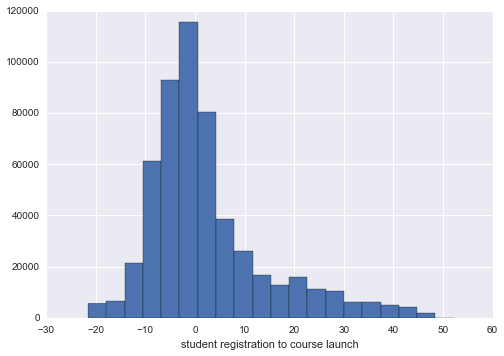

In [32]:
sns.set_style('darkgrid')

plt.xlabel('student registration to course launch')
plt.hist(df['regis_to_start'], 20);

## Some students showed no activity  beyond registration (~ 15% ot total). I remove these students. Then export the remaining into a new dataframe for exploration and learning. 

In [34]:
df_out = df[pd.notnull(df.last_event_DI)] # remove students with no activity

del df_out['course_id'], df_out['userid_DI'], df_out['start_time_DI'] 
del df_out['last_event_DI'], df_out['course_launch'], df_out['course_wrap']
df_out.index = arange(df_out.shape[0])
df_out.to_csv('learn.csv', index = False)

## The following shows that there is a clear difference between those who viewed some of course content and those who haven't seen any, in terms of when they last visited the course page. 

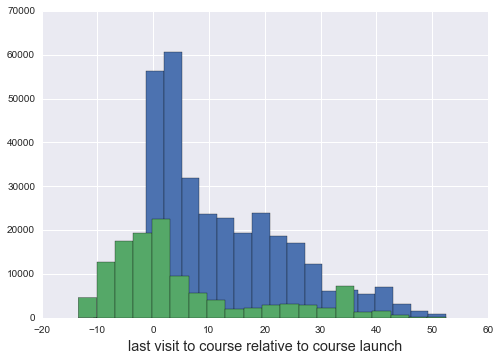

In [41]:
x = df_out[df_out['viewed'] == 1]
x.index = arange(len(x))

y = df_out[df_out['viewed'] == 0]
y.index = arange(len(y))

max_data = np.r_[x['last_event_to_launch'], y['last_event_to_launch']].max()
#bins = np.linspace(0, max_data, max_data + 1)
plt.xlabel('last visit to course relative to course launch', fontsize = 'x-large')


plt.hist(x['last_event_to_launch'], 20)
plt.hist(y['last_event_to_launch'], 20)
plt.savefig('last_to_launch.eps', format='eps')

plt.show()

## Effect of course duration on 'course view'

#pie charts

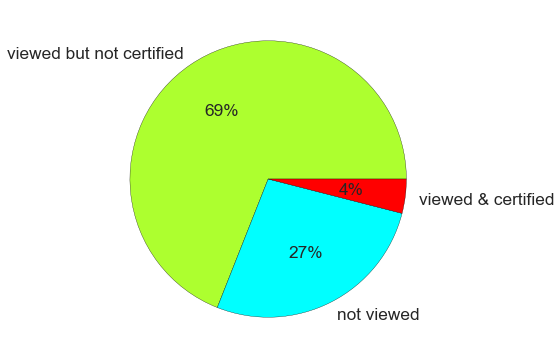

In [43]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(6,6))
ax = fig.add_axes([0.9, 0.1, 0.8, 0.8])

labels = 'viewed but not certified', 'not viewed', 'viewed & certified'
fracs = [69, 27, 4]
colors = ['greenyellow', 'cyan', 'red']


patches, texts, autotexts = ax.pie(fracs,colors=colors, labels = labels, autopct='%1.0f%%')

proptease = fm.FontProperties()
proptease.set_size('xx-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.savefig('pie.png', format='png', orientation='vertical')
plt.show()

## Drop rate vs weeks in course: this graph shows the average percentage students who churn the course as a function of weeks into the course. It suggests that the greatest drop happens in the first week of the course, after which the drop rates remains low and constant.  

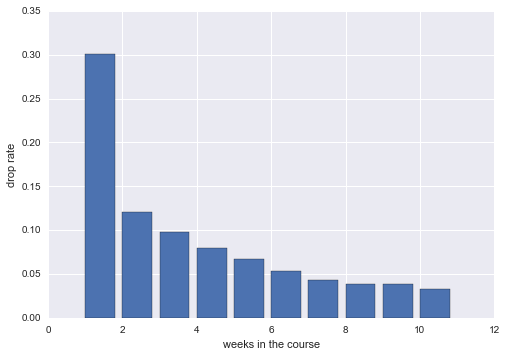

In [63]:
courses = df['course_id'].unique()
x = linspace(1, 10, 10)

st = [0 for i in xrange(10)]
for c in courses:
    df_course = df[df['course_id'] == c]
    df_course.index = arange(df_course.shape[0])
    n_students = []
    for wk in xrange(10):
        temp = df_course[df_course['last_event_to_launch'] >= wk]
        temp = temp[temp['last_event_to_launch'] < wk+1]
        n_students.append(len(temp)/float(df_course.shape[0]))

        #n_students.append(sum(df_course['weeks_in_course'] == wk)/float(df_course.shape[0]))
    st = np.add(st, n_students)    
        
plt.xlabel('weeks in the course')
plt.ylabel('drop rate')

plt.bar(x, st/10.);

## The following shows that certification rate is highest for those who register close to course launch date, after which it rapidly falls down. This is possibly due to the fact that it is harder to catch up, once registered late, in online courses where students are more or less on their own. 

!USE THIS TO CLAIM: ENROLLMENT MUST BE OPEN NO EARLIER THAN FEW WEEKS BEFORE THE LAUNCH.


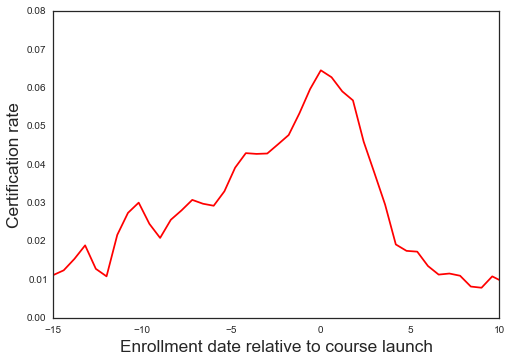

In [121]:
end = 20 
    
out2 = []
out3 = []
out4 = []
for wk in np.linspace(-15, 15, 51):#xrange(-end, end/2, 2):
    reg = df[df['regis_to_start'] <= wk]
    reg = reg[reg['regis_to_start'] >= wk-1]
    out2.append(sum(reg['viewed'] == 1)/float(reg.shape[0]))
    out3.append(sum(reg['explored'] == 1)/float(reg.shape[0]))
    out4.append(sum(reg['certified'] == 1)/float(reg.shape[0]))
        
#plot
#plt.subplot(121)
sns.set_style('white')

plt.xlim([-15,10])
#plt.ylabel('Enrollment')
plt.xlabel('Enrollment relative to launch')
#plt.hist(df['regis_to_start'], 70);


#plt.subplot(122)

#plt.plot(np.linspace(-15, 10, 51), out2, label="viewed")
#plt.plot(np.linspace(-15, 15, 51), out3, label="explored", color = 'red')
plt.plot(np.linspace(-15, 15, 51), out4, color='red')
plt.ylim([0, .08])

plt.xlabel('Enrollment date relative to course launch',  fontsize = 'xx-large')
plt.ylabel('Certification rate', fontsize = 'xx-large')
plt.legend(loc="upper left", fontsize = 'xx-large')
plt.savefig('engagement.eps', format='eps')


#plt.show()
print "!USE THIS TO CLAIM: ENROLLMENT MUST BE OPEN NO EARLIER THAN FEW WEEKS BEFORE THE LAUNCH."

In [35]:
np.linspace(-15, 15, 61)

array([-15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. ,
       -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,
        -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,
        -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,
         3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,
         7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,
        12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ])

# Effect of 'weeks in course':

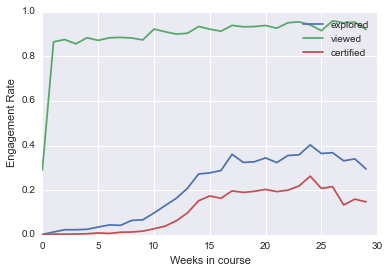

In [66]:
end = 30
#temp = df[df['explored'] == 1]
#for wk in xrange(-end, end):    
    #out0.append(sum(temp['regis_to_start'] == wk)/float(temp.shape[0]))   
    
out2 = []
out3 = []
out4 = []
for wk in xrange(0, end):
    reg = df[df['weeks_in_course'] == wk]
    out2.append(sum(reg['viewed'] == 1)/float(reg.shape[0]))
    out3.append(sum(reg['explored'] == 1)/float(reg.shape[0]))
    out4.append(sum(reg['certified'] == 1)/float(reg.shape[0]))
    
    
#plot
plt.subplot(111, title = '')
#plt.title()
#plt.xlabel('Enrollment wk relative to launch')
#plt.ylabel('Percentage')

#plt.plot(range(-end, end),out00)
#plt.plot(range(-end, end),out0)
#plt.plot(range(-end, end),out1)
#plt.subplot(122)
#plt.xlabel('Enrollment wk relative to launch')
#plt.legend()
#plt.ylabel('')
#plt.plot(range(0, end), out2, label="viewed")

plt.plot(range(0, end), out3, label="explored")
plt.plot(range(0, end), out2, label="viewed")

plt.plot(range(0, end), out4, label="certified")
plt.xlabel('Weeks in course')
plt.ylabel('Engagement Rate')
plt.legend();

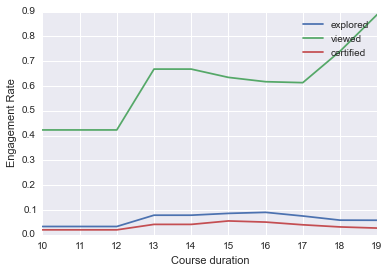

In [82]:
end = 20
#temp = df[df['explored'] == 1]
#for wk in xrange(-end, end):    
    #out0.append(sum(temp['regis_to_start'] == wk)/float(temp.shape[0]))   
    
out2 = []
out3 = []
out4 = []
for wk in xrange(10, end):
    reg = df[df['course_duration'] <= wk]
    reg = reg[reg['course_duration'] >= wk - 2]
    
    out2.append(sum(reg['viewed'] == 1)/float(reg.shape[0]))
    out3.append(sum(reg['explored'] == 1)/float(reg.shape[0]))
    out4.append(sum(reg['certified'] == 1)/float(reg.shape[0]))
    
    
#plot
#plt.title()
#plt.xlabel('Enrollment wk relative to launch')
#plt.ylabel('Percentage')

#plt.plot(range(-end, end),out00)
#plt.plot(range(-end, end),out0)
#plt.plot(range(-end, end),out1)
#plt.subplot(122)
#plt.xlabel('Enrollment wk relative to launch')
#plt.legend()
#plt.ylabel('')
#plt.plot(range(0, end), out2, label="viewed")

plt.plot(range(10, end), out3, label="explored")
plt.plot(range(10, end), out2, label="viewed")

plt.plot(range(10, end), out4, label="certified")
plt.xlabel('Course duration')
plt.ylabel('Engagement Rate')
plt.legend();

!Use this tho emphasis synchroneousness!


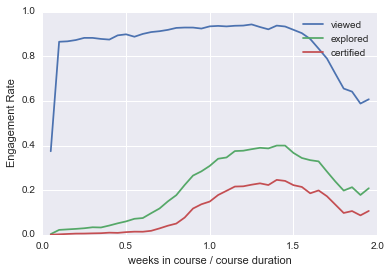

In [71]:
r_m = 2  
out2 = []
out3 = []
out4 = []
for r in arange(0.05, r_m, .05):
    #reg = df[df['weeks_in_course'] == wk]
    reg = df[df['weeks/duration'] <= r]
    reg = reg[reg['weeks/duration'] >= r - 0.05]
    out3.append(sum(reg['explored'] == 1)/float(reg.shape[0]))
    out4.append(sum(reg['certified'] == 1)/float(reg.shape[0]))
    out2.append(sum(reg['viewed'] == 1)/float(reg.shape[0]))
    
    
    
#plot
#plt.subplot(111, title = '')

plt.plot(arange(0.05, r_m, .05), out2, label="viewed")
plt.plot(arange(0.05, r_m, .05), out3, label="explored")
plt.plot(arange(0.05, r_m, .05), out4, label="certified")
plt.xlabel('weeks in course / course duration')
plt.ylabel('Engagement Rate')
plt.legend()
print "!Use this tho emphasis synchroneousness!"

In [73]:
max(df['weeks/duration'])

3.9801980198019802

# Activity

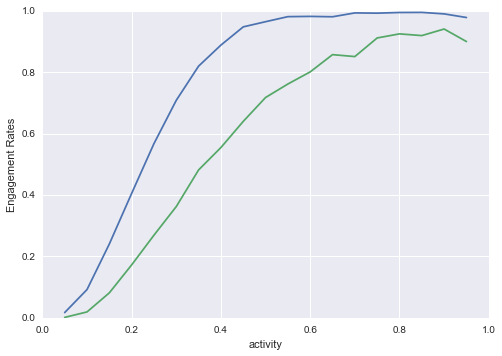

In [264]:
r_m = 1.0 
out3 = []
out4 = []
for r in arange(0.05, r_m, .05):
    #reg = df[df['weeks_in_course'] == wk]
    reg = df[df['activity'] <= r]
    reg = reg[reg['activity'] >= r - 0.05]
    out3.append(sum(reg['explored'] == 1)/float(reg.shape[0]))
    out4.append(sum(reg['certified'] == 1)/float(reg.shape[0]))
    #out2.append(sum(reg['viewed'] == 1)/float(reg.shape[0]))
    
    
    
#plot
plt.subplot(111, title = '')

#plt.plot(arange(0.05, r_m, .05), out2, label="explored")
plt.plot(arange(0.05, r_m, .05), out3, label="explored")
plt.plot(arange(0.05, r_m, .05), out4, label="certified")
plt.xlabel('activity') # active days / course duration
plt.ylabel('Engagement Rates');
#print "!Use this tho emphasis synchroneousness!"

In [259]:
df.head(3)

,course_id,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,nforum_posts,course_launch,course_wrap,no_courses,weeks_in_course,eff_weeks_in_course,regis_to_start,course_duration,activity,weeks/duration
0,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,0,United States,NaN,NaN,NaN,0,...,0,2012-10-15,2013-01-30,15,35.857143,31.857143,-4.000000,15.714286,0.145455,2.281818
1,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,France,NaN,NaN,NaN,0,...,0,2013-03-13,2013-08-26,4,19.000000,8.714286,-10.285714,23.285714,0.036810,0.815951
2,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,United States,NaN,NaN,NaN,0,...,0,2013-03-13,2013-08-26,7,4.142857,0.571429,-3.571429,23.285714,0.018405,0.177914


In [221]:
df.columns

Index([u'course_id', u'userid_DI', u'viewed', u'explored', u'certified',
       u'final_cc_cname_DI', u'LoE_DI', u'YoB', u'gender', u'grade',
       u'start_time_DI', u'last_event_DI', u'nevents', u'ndays_act',
       u'nplay_video', u'nchapters', u'nforum_posts', u'course_launch',
       u'course_wrap', u'no_courses', u'weeks_in_course',
       u'eff_weeks_in_course', u'regis_to_start', u'course_duration',
       u'week/duration'],
      dtype='object')

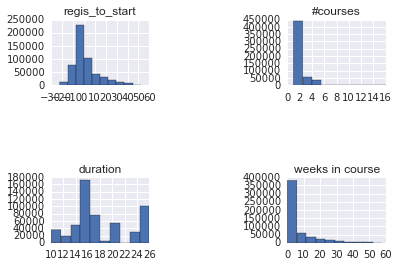

In [98]:
sns.set_style('darkgrid')
plt.subplot(331, title = 'regis_to_start')
plt.hist(df['regis_to_start'])
plt.subplot(333, title = '#courses')
plt.hist(df['no_courses'])
print ""
plt.subplot(337,title = 'duration')
plt.hist(df['course_duration'])
plt.subplot(339,title = 'weeks in course')
#sns.distplot(df['weeks_in_course'], kde=False, fit=stats.norm);
plt.hist(df['weeks_in_course']);

# number of people registered for each course

In [110]:
courses = df['course_id'].unique()
course_id_colm = sort(df['course_id'])

c0 = courses[0]
n = 0
count = {}
for c in course_id_colm:
    if c == c0:
        n += 1
    else:
        count[c0] = n
        c0 = c
        n = 1
    count[c] = n 
    

In [111]:
count

{'HarvardX/CB22x/2013_Spring': 28552,
 'HarvardX/CS50x/2012': 100467,
 'HarvardX/ER22x/2013_Spring': 54636,
 'HarvardX/PH207x/2012_Fall': 41111,
 'HarvardX/PH278x/2013_Spring': 35458,
 'MITx/14.73x/2013_Spring': 25148,
 'MITx/2.01x/2013_Spring': 5546,
 'MITx/3.091x/2012_Fall': 13926,
 'MITx/3.091x/2013_Spring': 5325,
 'MITx/6.002x/2012_Fall': 38937,
 'MITx/6.002x/2013_Spring': 19445,
 'MITx/6.00x/2012_Fall': 66124,
 'MITx/6.00x/2013_Spring': 50653,
 'MITx/7.00x/2013_Spring': 19558,
 'MITx/8.02x/2013_Spring': 25888,
 'MITx/8.MReV/2013_Summer': 8863}

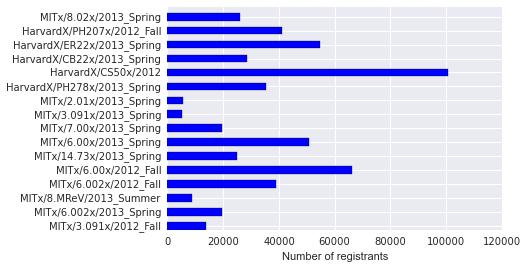

In [132]:
N = 16
menMeans   = count.values() #(20, 35, 30, 35, 27)
#womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, menMeans,   width, color='b')
#p2 = plt.bar(ind, womenMeans, width, color='y',
            # bottom=menMeans, yerr=menStd)

plt.xlabel('Number of registrants')
#plt.title('Scores by group and gender')
plt.yticks(ind+width/2., count.keys(),rotation=00)
#plt.yticks(np.arange(0,81,10))
#plt.legend( (p1[0], p2[0]), ('Men', 'Women') )

plt.show()

In [60]:
df.columns

Index([u'course_id', u'userid_DI', u'viewed', u'explored', u'certified',
       u'final_cc_cname_DI', u'LoE_DI', u'YoB', u'gender', u'grade',
       u'start_time_DI', u'last_event_DI', u'nevents', u'ndays_act',
       u'nplay_video', u'nchapters', u'nforum_posts', u'course_launch',
       u'course_wrap', u'no_courses', u'weeks_in_course', u'regis_to_start',
       u'course_duration'],
      dtype='object')

In [257]:
# correlation between regis_to_start and 
#plt.scatter(df_HW['regis_to_start'], df_HW['weeks_in_course'])

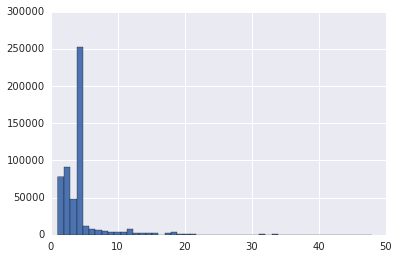

In [189]:
#z = [y[i] for i in xrange(len(y)) if y[i] > 0.05]
hist(x, 50);

# What is the relation between explored and certified?

In [265]:
sum(df['certified'] == 1)

6563